Iteration              0|loss:   1.945854621695373


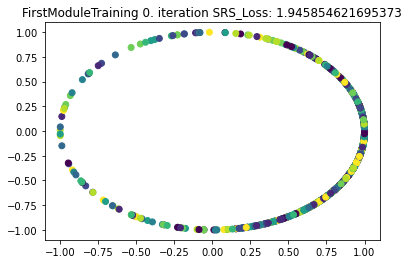

Iteration            500|loss:   1.248280600421864


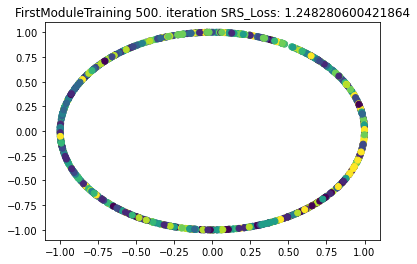

Iteration           1000|loss:  1.2045950025907959


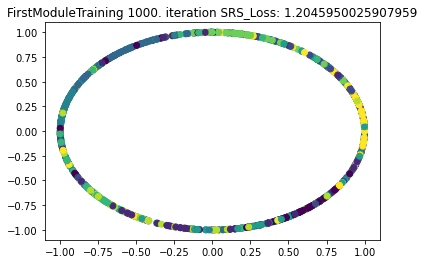

Iteration           1500|loss:  1.1695912926341614


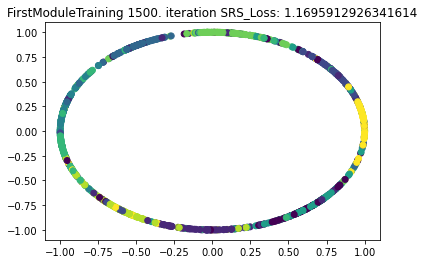

Iteration           2000|loss:  1.1446291694655746


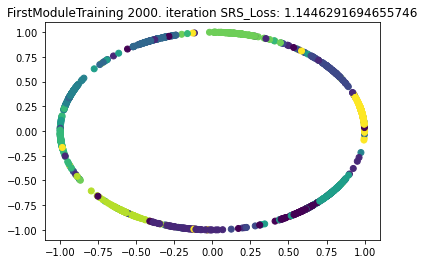

Iteration           2500|loss:  1.1307717721805726


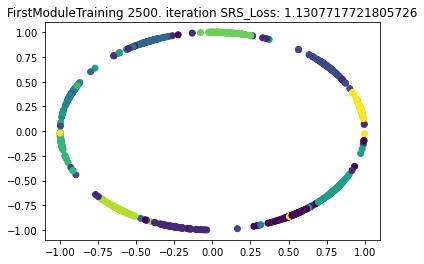

Iteration           3000|loss:  1.1225163144709531


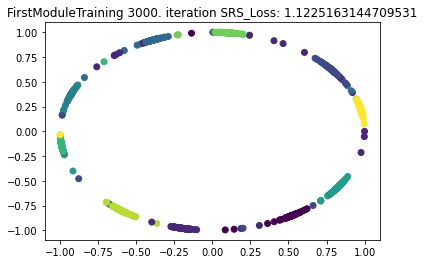

Iteration           3500|loss:  1.1176642625941384


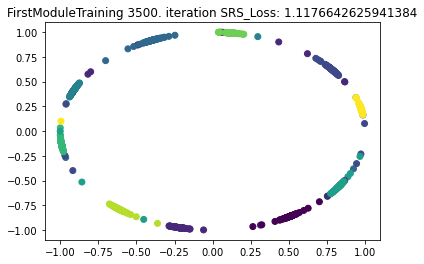

Iteration           4000|loss:  1.1125435314228125


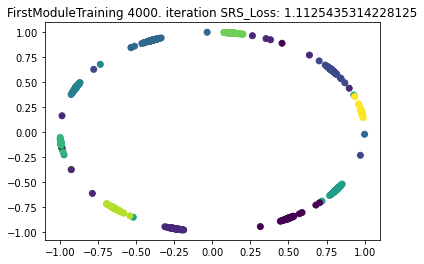

Iteration           4500|loss:  1.1115515457622842


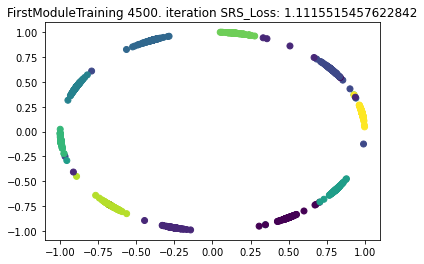

Iteration           5000|loss:    1.10912135455587


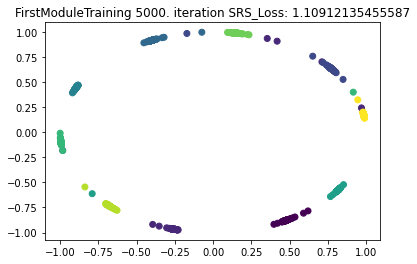

Iteration           5500|loss:  1.1078725101988234


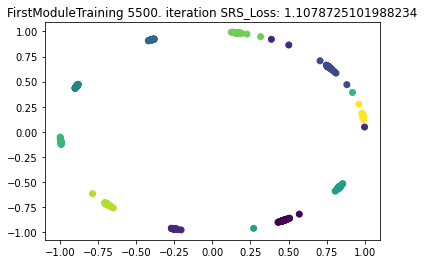

Iteration           6000|loss:  1.1076435151488033


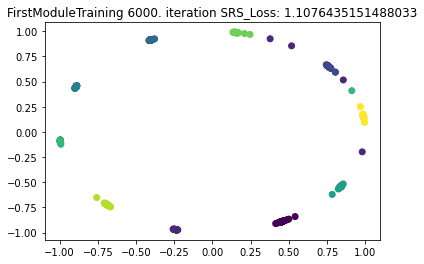

Iteration           6500|loss:   1.107357587035253


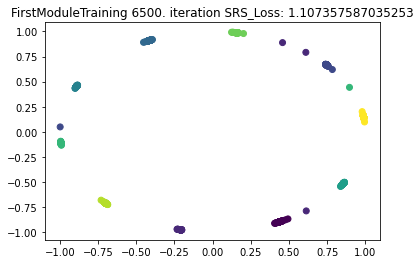

Iteration           7000|loss:  1.1067421364036154


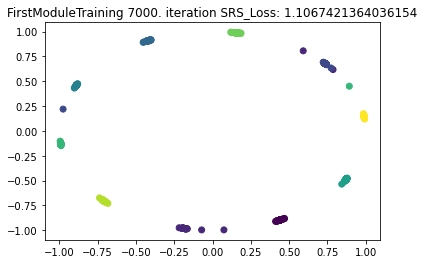

Iteration           7500|loss:    1.11044229493077


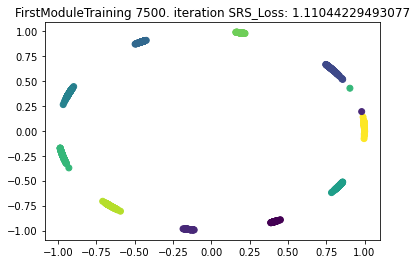

Iteration           8000|loss:  1.1059328310016352


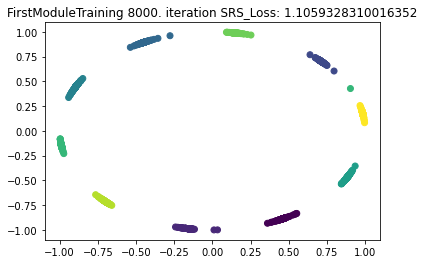

Iteration           8500|loss:  1.1056173220786645


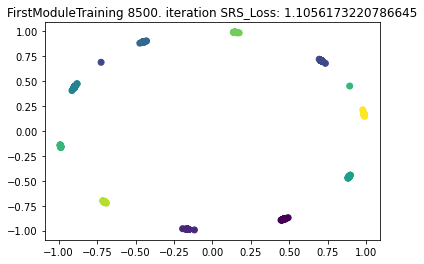

Iteration           9000|loss:  1.1052481808676784


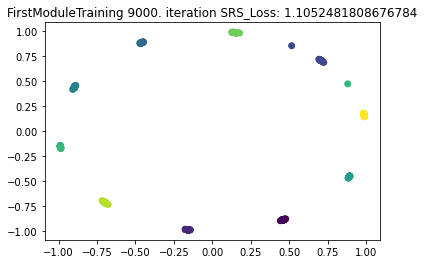

Iteration           9500|loss:   1.105240743617223


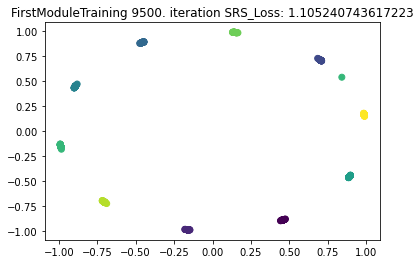

Iteration          10000|loss:    1.10521343105981


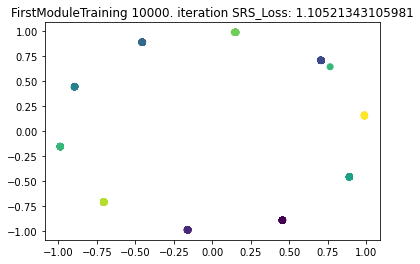

Iteration          10500|loss:  1.1052040415451088


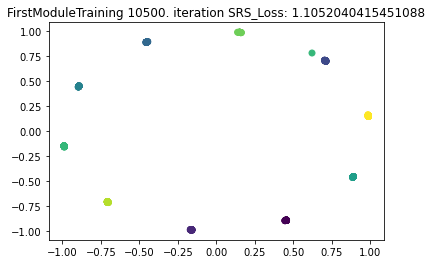

Iteration          11000|loss:   1.105175163387976


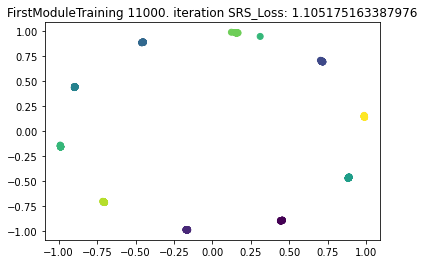

Iteration          11500|loss:  1.1050323569386993


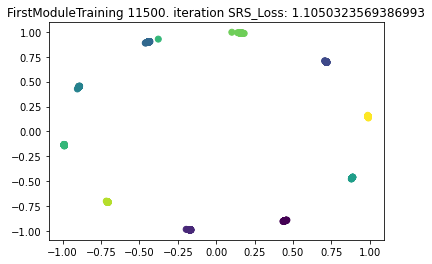

Iteration          12000|loss:  1.1047273290906046


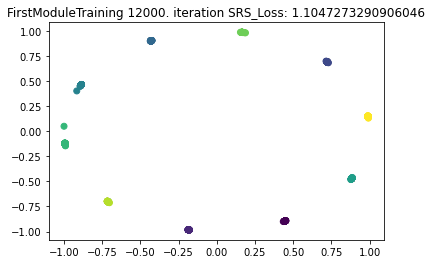

Iteration          12500|loss:  1.1047089296444126


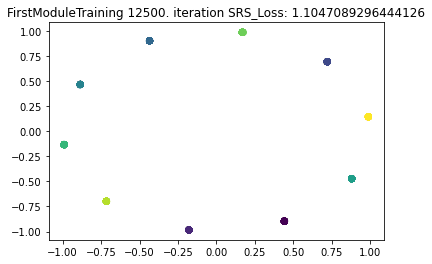

Iteration          13000|loss:  1.1063272071041883


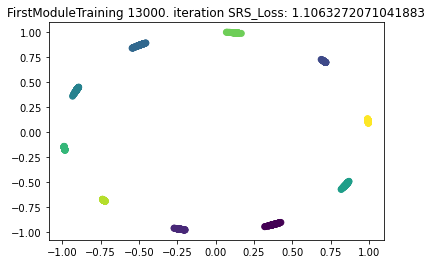

Iteration          13500|loss:  1.1055150054277845


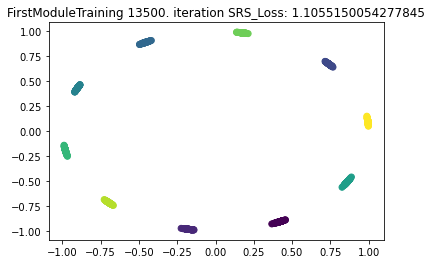

Iteration          14000|loss:  1.1047102359758898


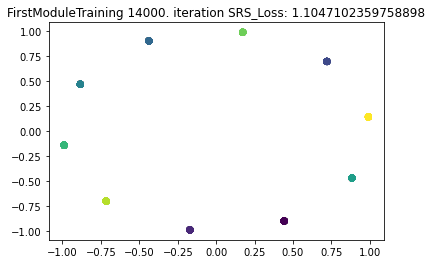

Iteration          14500|loss:  1.1047085693846819


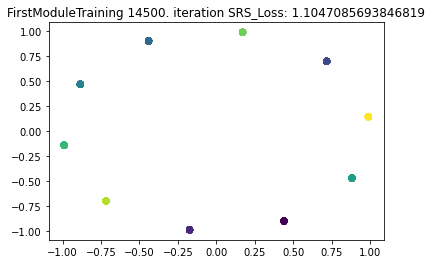

Iteration          15000|loss:  1.1047085708404694


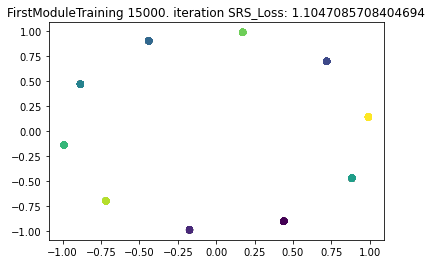

Iteration          15500|loss:   1.104737204827999


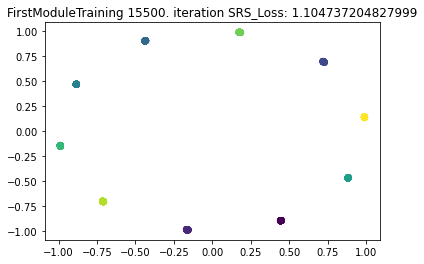

Iteration          16000|loss:   1.104708594922364


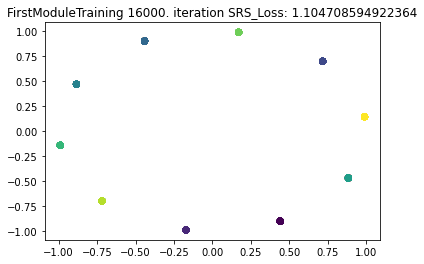

Iteration          16500|loss:  1.1047845636707578


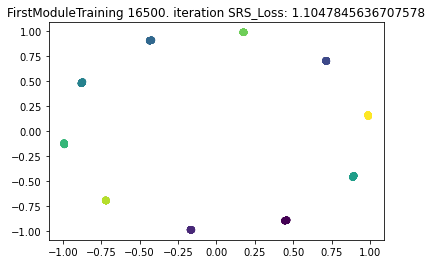

Iteration          17000|loss:  1.1047085536223324


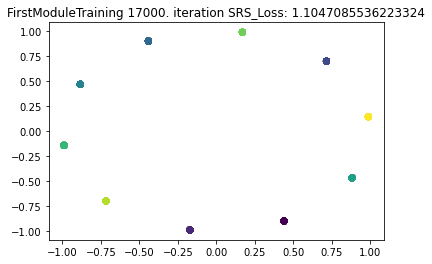

Iteration          17500|loss:  1.1047085583260032


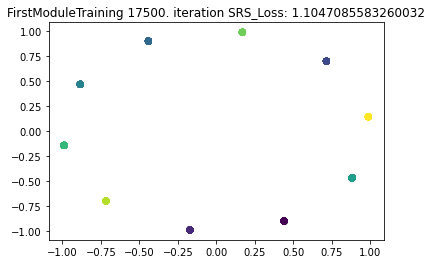

Iteration          18000|loss:   1.104708559578297


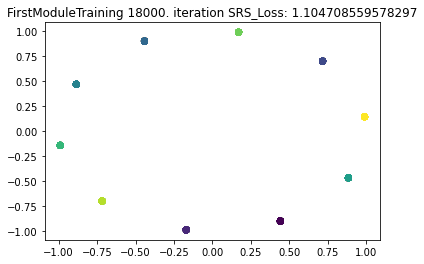

Iteration          18500|loss:  1.1047190606283568


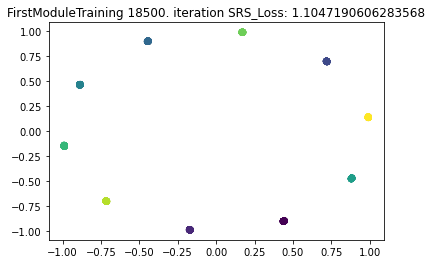

Iteration          19000|loss:   1.104713030197314


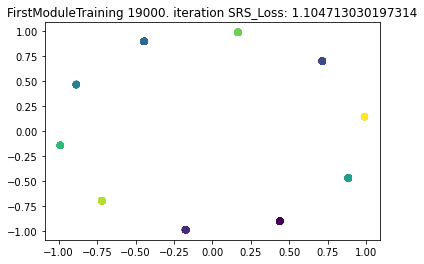

Iteration          19500|loss:  1.1047085613277232


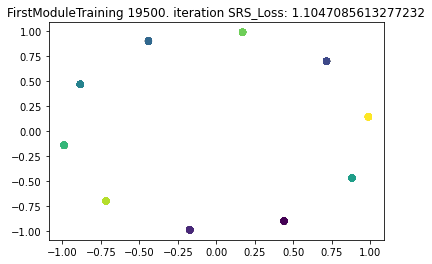

Iteration          20000|loss:  1.1047085518328463


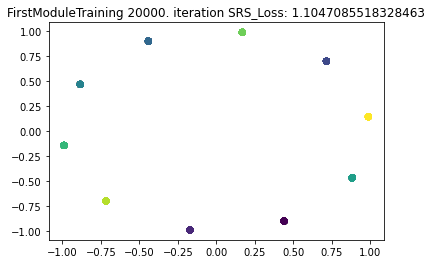

Iteration          20500|loss:   1.104708562493775


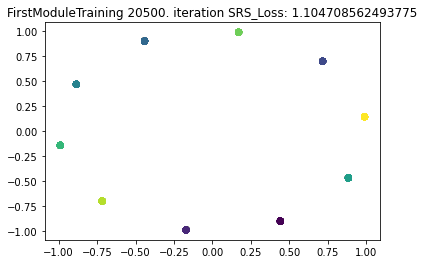

Iteration          21000|loss:  1.1047088044753333


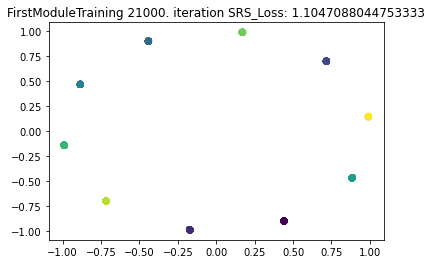

Iteration          21500|loss:  1.1047088248563397


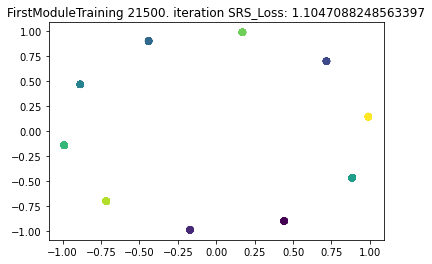

Iteration          22000|loss:  1.1047085591151782


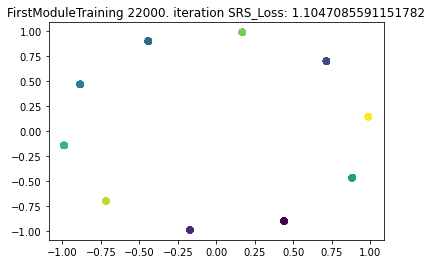

Iteration          22500|loss:  1.1048706658824514


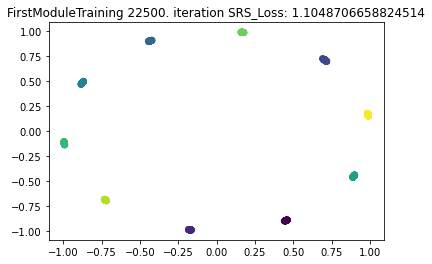

Iteration          23000|loss:  1.1047086388325962


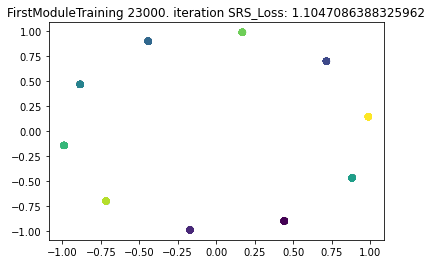

Iteration          23500|loss:  1.1047094273806364


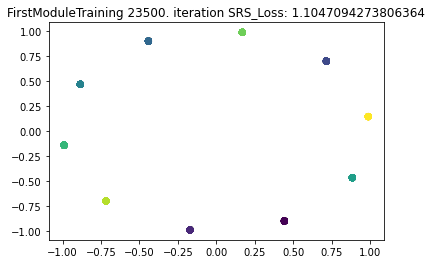

Iteration          24000|loss:  1.1065589974372099


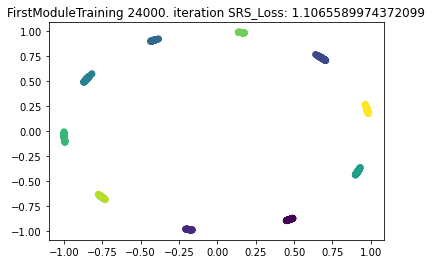

Iteration          24500|loss:  1.1048052654670564


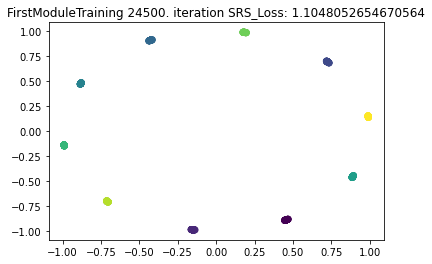

##### Output Module training... #####
0.03131218444962332
    0| 0.1
  100| 0.2
  200|0.328
  300| 0.4
  400|0.473
  500|0.492
  600|0.498
  700|0.499
  800| 0.5
  900|0.588
 1000| 0.6
 1100| 0.6
 1200| 0.6
 1300|0.605
 1400|0.625
 1500|0.639
 1600|0.653
 1700|0.674
 1800|0.696
 1900|0.701
 2500|0.706
 3000|0.723
 3500|0.759
 4000|0.855
 4500|0.87
 5000|0.883
 5500|0.91
 6000|0.959
 6500|0.997
 7000|0.997
 7500|0.998
 8000|0.998
 8500|0.996
 9000|0.995
 9500|0.995


In [4]:
import autograd.numpy as np
# import numpy as np
import autograd.numpy.random as npr
from autograd import grad
from autograd.misc.optimizers import adam
from matplotlib import axis
import matplotlib.pyplot as plt
from autograd.scipy.special import logsumexp
import numpy as numpy

layer_sizes = [32,1000,512,2,10]
param_scale=0.1
scale=0.1
sample_size = 1000
n_classes = 10
step_size =0.001
# random, but balanced, labels
if sample_size % n_classes:
    raise('n_classes does not divide sample_size')
n_examples = int(sample_size / n_classes)
y = []
for i in range(n_classes):
    y += [i] * n_examples
# y = npr.permutation(y)
# y_long = y.astype(int)
# x = npr.rand(sample_size, 32)
# x = x.astype(np.float32)
x = np.load("x.npy")
y = np.load("y.npy")
y_long = y.astype(np.int32)

def relu(x):
    return np.maximum(x, 0)

def tanh(inputs):
    return np.tanh(inputs)

def tanh_norm(inputs):
    z = tanh(inputs)
    znorm = z / (np.sqrt(np.sum(np.power(np.abs(z), 2), axis=1, keepdims=True)))
    return znorm

def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
    # return [(scale * npr.randn(m, n),   # weight matrix
    #          scale * npr.randn(n))      # bias vector
    #         for m, n in zip(layer_sizes[:-1], layer_sizes[1:])]
    return [(np.load("w0.npy"), np.load("b0.npy")), (np.load("w1.npy"), np.load("b1.npy"))]

def neural_net_predict(params, inputs):
    for W, b in params:
        outputs = np.dot(inputs, W.T) + b
        inputs = relu(outputs)
    return outputs

def accuracy(params, inputs, targets):
    predicted_class = np.argmax(neural_net_predict(params, inputs), axis=1)
    return np.mean(predicted_class == targets)

def k_mtrx(x0, x1):
    return np.matmul(tanh_norm(x0), tanh_norm(x1).T)

def map_input(x):
    return np.where(
         np.eye(len(x)) == 1,
            np.array(-float("inf"), dtype=np.float32),
            k_mtrx(x, x)
        )


def one_hot_encode(target, n_classes):
    
    if target.ndim > 1:
        target = np.squeeze(target)
    target_onehot = np.zeros((target.shape[0], n_classes))
    # target_onehot[range(target.size(0)), target] = 1
    # target_onehot[range(target.size(0)).long(), target.long()] = 1
    target_onehot[range(target.shape[0]), target.astype(int)] = 1
    return target_onehot

def get_ideal_k_mtrx(target1, target2, n_classes):
    
    k_min = -1.
    k_max = 1.
    if n_classes < 2:
        raise ValueError('You need at least 2 classes')

    if len(target1.shape) > 2:
        raise ValueError('target1 has too many dimensions')
    if len(target2.shape) > 2:
        raise ValueError('target2 has too many dimensions')

    if np.max(target1) + 1 > n_classes:
        raise ValueError('target1 has at least one invalid entry')
    if np.max(target2) + 1 > n_classes:
        raise ValueError('target2 has at least one invalid entry')

    target1_onehot, target2_onehot = \
        one_hot_encode(target1, n_classes).astype(np.float32), \
        one_hot_encode(target2, n_classes).astype(np.float32)
    ideal = np.matmul(target1_onehot, target2_onehot.T)
    if k_min != 0:
        min_mask = np.full(ideal.shape, k_min)
        ideal = np.where(ideal == 0, min_mask, ideal)

    if k_max != 1:
        max_mask = np.full_like(ideal, k_max)
        ideal = np.where(ideal == 1, max_mask, ideal)
    return ideal

######################### Train the input module #########################

def srs_loss(x, y, num_classes):
    k_min = -1.
    xx = map_input(x)
    k_ideal = get_ideal_k_mtrx(y, y, num_classes)
    return -np.mean(np.exp(xx[k_ideal == k_min]))

init_params = init_random_params(scale,layer_sizes)


def print_perf(params, iter, gradient):
    if iter % 500 == 0:
        #train_acc = accuracy(params, x, y_long)
        out = neural_net_predict(params, x)
        loss = -srs_loss(out, y_long, n_classes)
        print("Iteration{:15}|loss:{:20}".format(iter, loss))
        new_rep = tanh_norm(neural_net_predict(params,x))
        plt.scatter(new_rep[:,0], new_rep[:,1],c=y_long)
        plt.title("FirstModuleTraining {}. iteration SRS_Loss: {}".format(iter,loss))
        plt.show()



def input_module_objective(param, iter):
    out = neural_net_predict(param, x)
    loss = -srs_loss(out, y_long, n_classes)

    return loss

srs_loss_grad = grad(input_module_objective)
optimized_params_head = adam(srs_loss_grad, init_params, step_size=step_size,num_iters=25000,
                            callback=print_perf)

dataForTail = neural_net_predict(optimized_params_head,x)

######################### Train the output module #########################
#[(w0,b0),(w1,b1)] = optimized_params_head.copy()

print("##### Output Module training... #####")
w2=npr.randn(10,2)
b2=np.zeros(10,)

init_params_tail = [(w2,b2)]


def softmax(x):
    out = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    return out


def classification_layer_predict(params, dataForTail):
    for W, b in params:
        outputs = np.dot(dataForTail, W.T) + b
        #outputs = np.exp(outputs - np.max(outputs))
        #probabilities = outputs / np.sum(outputs, axis=1, keepdims=True)
        #return probabilities
        return outputs

def accuracy_tail(params, inputs, targets):
    nn_out = neural_net_predict(optimized_params_head, inputs)
    predicted_class = np.argmax(classification_layer_predict(params, nn_out), axis=1)
    return np.mean(predicted_class == targets)


def print_perf_tail(params, iter, gradient):
    if (iter % 100 == 0) and iter<2000:
        train_acc = accuracy_tail(params, x, y_long)
        print("{:5}|{:4}".format(iter, train_acc))
    elif (iter % 500 ==0) and iter>2000:
        train_acc = accuracy_tail(params, x, y_long)
        print("{:5}|{:4}".format(iter, train_acc))

def crossentropy_loss(out, y_long):
    out = np.log(softmax(out))
    y_long = one_hot_encode(y_long, n_classes)
    loss = -y_long*out
    return loss.mean()


def output_module_objective(params,iter):
    out = classification_layer_predict(params,dataForTail)
    loss = crossentropy_loss(out, y_long)
    return loss

crossentropy_loss_grad = grad(output_module_objective)
step_size = 0.001

print(softmax(classification_layer_predict(init_params_tail, dataForTail)).min()) #Why min?

optimized_params = adam(crossentropy_loss_grad, init_params_tail, step_size=step_size,num_iters=10000,
                            callback=print_perf_tail)